## This Notebook will be used to demonstrate the steps to build a Naive Bayes Model mentioned in this blog: [Naive Bayes Classifier: Supervised Machine Learning Algorithm](https://www.enjoyalgorithms.com/blog/naive-bayes-in-ml/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the IRIS dataset and Visualizing the Pair plot

Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<Figure size 640x480 with 0 Axes>

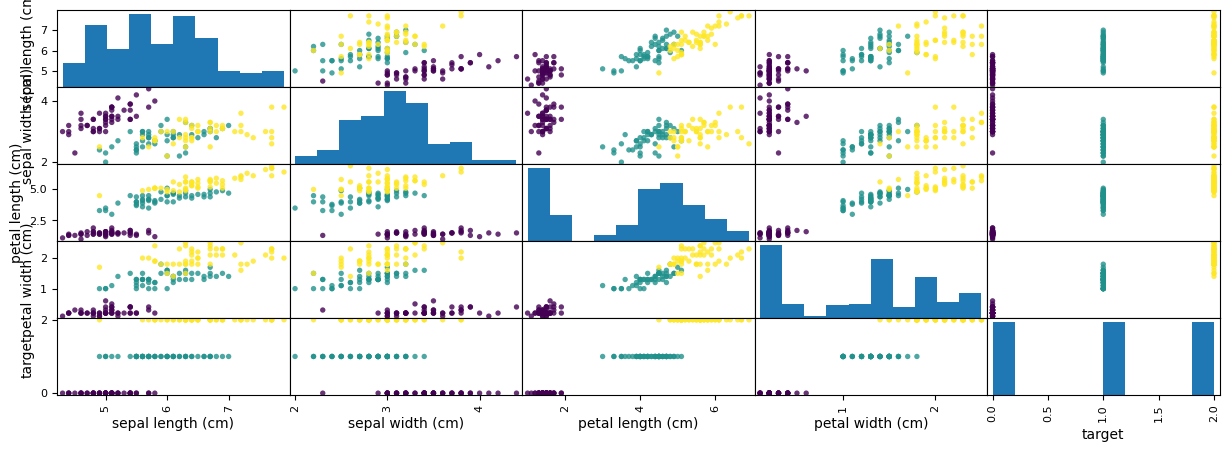

In [4]:
from sklearn import datasets

iris = datasets.load_iris()            #loading dataset

X = iris.data[:,]                    #input
y = iris.target                      #target

print("Features : ", iris['feature_names'])

iris_dataframe = pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                             columns=iris['feature_names']+['target'])

plt.figure()
grr = pd.plotting.scatter_matrix(iris_dataframe, c=iris['target'],
                                  figsize=(15,5),
                                  s=60,alpha=0.8)
plt.show()

### Analyzing the cross-correlation matrix by plotting it using Seaborn library 

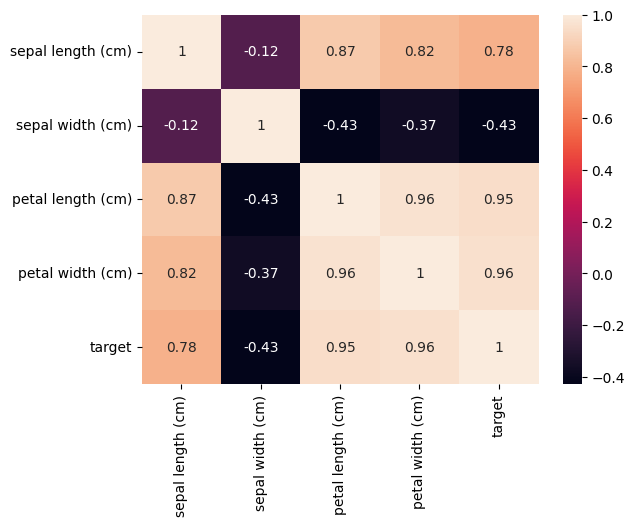

In [5]:
import seaborn as sns
dataplot = sns.heatmap(iris_dataframe.corr(), annot=True)

plt.show()

### Splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### Fitting Naive Bayes model

In [7]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

### Evaluating the trained model

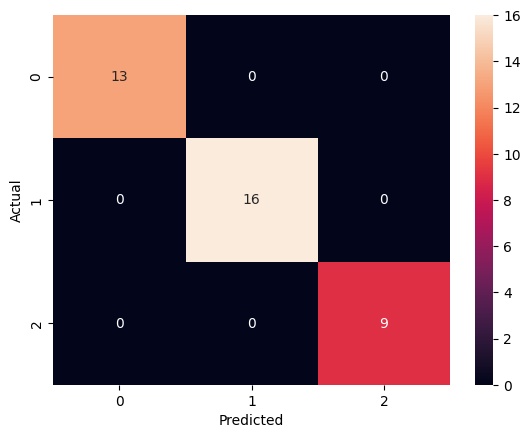

In [8]:
Y_pred = NB.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

sns.heatmap(df_cm, annot=True)# font size
plt.show()